
<h1 align=left><font size = 5>Predicting Caravan Customers</font></h1>

Capstone Project: Predicting and Explaining Caravan Policy Ownership

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya

##  **Introduction**

A Norwegian insurance company was interested in a machine learning solution to find best customers to market its caravan insurance product. Without sending mass email to all customers, it is cost effective for the company to identify best possible customers who will buy caravan insurance and only approach those customers.

**Dataset**: Insurance Company Benchmark (COIL 2000). This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data
Dataset can be found in this link : https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29


**Research questions**

Q1. Predict which customers are potentially interested in a caravan insurance policy.

Q2. Describe the actual or potential customers; and possibly explain why these customers buy a caravan policy.

Q3. How does Caravan Insurance ownership varies across different demographic areas, and can we create distinct profiles of Caravan Insurance customers based on sociodemographic data?

Q4. Predicting a customer's likelihood to purchase Caravan Insurance based on their sociodemographic characteristics

Q5. What frequent associations can be identified in the product ownership data?


##  **Approach**

*  Exploratory Data Analysis (EDA):

   *  Visit EDA   [here](https:////github.com/manohariw44/TMU-Big-Data-Analytics-Capstone-Project/blob/da078af84674f2f8550782067226fa07c35b539d/PY01_Capst_EDA.ipynb)
     


*  Preprocessing:
   * Drop attributes of low variance
   *  Encoding the categorical features
       *  Categorical to One-Hot (numeric) Encoding
   *  Split the dataset into training and testing sets
   *  Sampling technique on training set - SMOTE
   *  Create cross-validation sets

*  Classification Model:

   *  Approach 1 - Multinomial Naïve Bayes:
      *  Choose traning/test split
      *  Use Naïve Byes classifier from Python sklearn and weka packages
      *  Evaluate model using confusion matrix
      
   *  Approach 2 - Decision Tree :
      * Choose training/test split, maximum depth of tree
      * Evaluate model using confusion matrix

   *  Approach 3 - Random forest :
      * Start by randomly selecting a subset of the training data, with replacement.
      *  Select features and build decision tree
      *  Repeat steps
      *  Combine the predictions of all trees to make a final prediction

   *  Approach 4 - Logistic regression:
  
   *  Approach 5 - K Nearest Neighbours :   
      

*  Feature Selection
    *  Correlation Matrix
    * Removing features with low variance
    * Univariate feature selection
        *  Examine chi-squre score and p value for each attribute
    * Recursive Feature Elimination with Cross validation
    *  k fold cross validation
        * split training data into k equally sized subsets or folds
        * The model is trained on k-1 of these folds and tested on the remaining fold.
        * The performance of the model is then averaged across all k folds


* Association Rules:

  *  Approach 1 - Apriori :
     
      * Select features using Chi-square Test, Fisher’s Score

  * Approach 2 - Fpgrowth

  *  Approach 3 - k-means algorithm :

  * Model selection criteria
     * high accuracy, high recall on target = 1





 Import libraries

In [ ]:
#Installing Python packages
import pandas as pd
import numpy as np

import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree
import graphviz

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
#from naive_feature_selection import NaiveFeatureSelection

from matplotlib import colors as mcolors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=6b7b91b47a51bae5522693ce6e1a088d78644025dd62c47b710197d76ef45ab3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import SelectFromModel
!pip install category_encoders
import category_encoders as ce

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


load data and store in dataframe df_ori:

In [ ]:
# Data set for training model
df_ori = pd.read_csv("/content/ticdata2000.txt",  delimiter = "\t",header=None)

In [ ]:
# Add column headings
# column names from the data dictionary
#df_ori.columns=['MOSTYPE',	'MAANTHUI',	'MGEMOMV',	'MGEMLEEF',	'MOSHOOFD',	'MGODRK',	'MGODPR',	'MGODOV',	'MGODGE',	'MRELGE',	'MRELSA',	'MRELOV',	'MFALLEEN',	'MFGEKIND',	'MFWEKIND',	'MOPLHOOG',	'MOPLMIDD',	'MOPLLAAG',	'MBERHOOG',	'MBERZELF',	'MBERBOER',	'MBERMIDD',	'MBERARBG',	'MBERARBO',	'MSKA',	'MSKB1',	'MSKB2',	'MSKC',	'MSKD',	'MHHUUR',	'MHKOOP',	'MAUT1',	'MAUT2',	'MAUT0',	'MZFONDS',	'MZPART',	'MINKM30',	'MINK3045',	'MINK4575',	'MINK7512',	'MINK123M',	'MINKGEM',	'MKOOPKLA',	'PWAPART',	'PWABEDR',	'PWALAND',	'PPERSAUT',	'PBESAUT',	'PMOTSCO',	'PVRAAUT',	'PAANHANG',	'PTRACTOR',	'PWERKT',	'PBROM',	'PLEVEN',	'PPERSONG',	'PGEZONG',	'PWAOREG',	'PBRAND',	'PZEILPL',	'PPLEZIER',	'PFIETS',	'PINBOED',	'PBYSTAND',	'AWAPART',	'AWABEDR',	'AWALAND',	'APERSAUT',	'ABESAUT',	'AMOTSCO',	'AVRAAUT',	'AAANHANG',	'ATRACTOR',	'AWERKT',	'ABROM',	'ALEVEN',	'APERSONG',	'AGEZONG',	'AWAOREG',	'ABRAND',	'AZEILPL',	'APLEZIER',	'AFIETS',	'AINBOED',	'ABYSTAND',	'CARAVAN']
# English coulmn names for ease of reference. 1 - 43 are demographic varaibles (column name with prefix sd_), values based on zip code.
#44-86 are product ownership of insurance customers (column name with prefix po_).  target varaible : po_ins_pol_caravan
#df_ori.columns=['cust_subtype',	'no_of_houses',	'avg_household',	'avg_age_band',	'cust_maintype',	'religion_catholic',	'religion_protestant',	'religion_other',	'religion_no',	'rel_married',	'rel_living_tg',	'rel_other',	'rel_no_singles',	'hshold_wo_children',	'hshold_w_children',	'education_higher',	'education_medium',	'education_lower',	'empst_high',	'empst_Entrepr ',	'empst_farmer',	'empst_mdl_mgmt',	'empst_skill_labour',	'empst_unskill_labour',	'socialclassA',	'socialclassB1',	'socialclassB2',	'socialclassC',	'socialclassD',	'rentedhouse',	'homeowners',	'car_1',	'car_2',	'car_0',	'health_ins_national',	'health_ins_private',	'income_l_30k',	'income_30k_45k',	'income_45k_75k',	'income_75k_122k',	'income_g_123k',	'income_avg',	'p_power_class',	'ins_pol_thirdparty_pvt',	'ins_pol_thirdparty_firms',	'ins_pol_thirdparty_agri',	'ins_pol_car',	'ins_pol_del_van',	'ins_pol_motorcycle_sc',	'ins_pol_lorry',	'ins_pol_trailer',	'ins_pol_tractor',	'ins_pol_agri_machines',	'ins_pol_moped',	'ins_pol_life',	'ins_pol_accident_ins_pvt',	'ins_pol_accident_ins_fam',	'ins_pol_disability',	'ins_pol_fire',	'ins_pol_surfboard',	'ins_pol_boat',	'ins_pol_bicycle',	'ins_pol_property',	'ins_pol_social security',	'no_ins_pol_thirdparty_pvt',	'no_ins_pol_thirdparty_firms',	'no_ins_pol_thirdparty_agri',	'no_ins_pol_car',	'no_ins_pol_del_van',	'no_ins_pol_motorcycle_sc',	'no_ins_pol_lorry',	'no_ins_pol_trailer',	'no_ins_pol_tractor',	'no_ins_pol_agri_machines',	'no_ins_pol_moped',	'no_ins_pol_life',	'no_ins_pol_accident_ins_pvt',	'no_ins_pol_accident_ins_fam',	'no_ins_pol_disability',	'no_ins_pol_fire',	'no_ins_pol_surfboard',	'no_ins_pol_boat',	'no_ins_pol_bicycle',	'no_ins_pol_property',	'no_ins_pol_social security',	'no_ins_pol_caravan']
df_ori.columns=['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,	'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ,	'po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ,	'po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ,	'po_ins_pol_caravan']
# keeping only sociodemographic attributes
df_ori2=  df_ori[['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class', 	'po_ins_pol_caravan' ]]
# add new column file_name
df_ori2['file_name']= 'base            '
df_ori2['po_ins_pol_caravan'] = df_ori2['po_ins_pol_caravan'].astype('str',copy=False)
df_ori2.head()

<ipython-input-38-a8978e59cb47>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ori2['file_name']= 'base            '
<ipython-input-38-a8978e59cb47>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ori2['po_ins_pol_caravan'] = df_ori2['po_ins_pol_caravan'].astype('str',copy=False)


,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,...,sd_health_ins_private,sd_income_l_30k,sd_income_30k_45k,sd_income_45k_75k,sd_income_75k_122k,sd_income_g_123k,sd_income_avg,sd_p_power_class,po_ins_pol_caravan,file_name
0,33,1,3,2,8,0,5,1,3,7,...,1,0,4,5,0,0,4,3,0,base
1,37,1,2,2,8,1,4,1,4,6,...,3,2,0,5,2,0,5,4,0,base
2,37,1,2,2,8,0,4,2,4,3,...,0,4,5,0,0,0,3,4,0,base
3,9,1,3,3,3,2,3,2,4,5,...,2,1,5,3,0,0,4,4,0,base
4,40,1,4,2,10,1,4,1,4,7,...,4,0,0,9,0,0,6,3,0,base


In [ ]:
df_ori2.dtypes

In [ ]:
#Dataset to use benchmarking model.
df_test_eval_ori = pd.read_csv("/content/ticeval2000.txt",  delimiter = "\t",header=None)
df_test_tgts_ori = pd.read_csv("/content/tictgts2000.txt",  delimiter = "\t",header=None)
# Add column headings
df_test_eval_ori.columns=['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,	'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ,	'po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ,	'po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ]
# keeping only sociodemographic attributes
df_test_eval_ori2=  df_test_eval_ori[['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ]]
df_test_tgts_ori.columns=['po_ins_pol_caravan']
df_test_tgts_ori['po_ins_pol_caravan'] = df_test_tgts_ori['po_ins_pol_caravan'].astype('str',copy=False)
print(df_test_eval_ori.dtypes)
# add new column file_name
df_test_eval_ori2['file_name']= 'benchmark'
df_test_eval_ori2.head()

sd_cust_subtype                  int64
sd_no_of_houses                  int64
sd_avg_household                 int64
sd_avg_age_band                  int64
sd_cust_maintype                 int64
                                 ...  
po_no_ins_pol_surfboard          int64
po_no_ins_pol_boat               int64
po_no_ins_pol_bicycle            int64
po_no_ins_pol_property           int64
po_no_ins_pol_social security    int64
Length: 85, dtype: object


<ipython-input-40-d6630a3b4a9f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_eval_ori2['file_name']= 'benchmark'


,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,...,sd_health_ins_national,sd_health_ins_private,sd_income_l_30k,sd_income_30k_45k,sd_income_45k_75k,sd_income_75k_122k,sd_income_g_123k,sd_income_avg,sd_p_power_class,file_name
0,33,1,4,2,8,0,6,0,3,5,...,8,1,3,3,3,0,0,3,3,benchmark
1,6,1,3,2,2,0,5,0,4,5,...,7,2,1,1,5,4,0,6,8,benchmark
2,39,1,3,3,9,1,4,2,3,5,...,6,3,2,4,3,1,0,3,5,benchmark
3,9,1,2,3,3,2,3,2,4,5,...,7,2,2,5,3,1,0,4,4,benchmark
4,31,1,2,4,7,0,2,0,7,9,...,9,0,5,4,0,0,0,3,1,benchmark


In [ ]:
# checking value counts of target varaible
df_ori.po_ins_pol_caravan.value_counts()

0    5474
1     348
Name: po_ins_pol_caravan, dtype: int64

In [ ]:
# test file
df_test_tgts_ori.po_ins_pol_caravan.value_counts()

0    3762
1     238
Name: po_ins_pol_caravan, dtype: int64

# Preprocessing

combine validation and test files to use for encoding.

In [ ]:
df_sc = pd.concat([df_ori2,df_test_eval_ori2])

In [ ]:
# checking variable types
df_test = df_sc
temp = pd.DataFrame(index=df_test.columns)
temp['data_type']=df_test.dtypes
temp['unique_count']=df_test.nunique()
temp

In [ ]:
df_sc['file_name'].value_counts()

base                5822
benchmark           4000
Name: file_name, dtype: int64

In [ ]:
df_sc.shape

(9822, 87)

**Removing features with low variance**

Since the dataset has very small number of positive target records, low variance records were selected after filtering positive target records. This is to avoid dropping a variable that has corelation to positive targets. eg. overall insurance customers has 0.22% of boat policies. But this is 39% out of customers who have a caravan policy.

In [ ]:
# dataset
X=df_sc.iloc[:,0:43]
y=df_sc.iloc[:,43]

In [ ]:
# we are removing features that has more than 99.5% zeros.
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.1):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

filtered_data=variance_threshold_selector(X)
filtered_data1=filtered_data.merge(y, left_index=True, right_index=True)
filtered_data1.head()

,sd_cust_subtype,sd_no_of_houses,sd_avg_household,sd_avg_age_band,sd_cust_maintype,sd_religion_catholic,sd_religion_protestant,sd_religion_other,sd_religion_no,sd_rel_married,...,sd_health_ins_national,sd_health_ins_private,sd_income_l_30k,sd_income_30k_45k,sd_income_45k_75k,sd_income_75k_122k,sd_income_g_123k,sd_income_avg,sd_p_power_class,po_ins_pol_caravan
0,33,1,3,2,8,0,5,1,3,7,...,8,1,0,4,5,0,0,4,3,0
0,33,1,3,2,8,0,5,1,3,7,...,8,1,0,4,5,0,0,4,3,NaN
0,33,1,4,2,8,0,6,0,3,5,...,8,1,3,3,3,0,0,3,3,0
0,33,1,4,2,8,0,6,0,3,5,...,8,1,3,3,3,0,0,3,3,NaN
1,37,1,2,2,8,1,4,1,4,6,...,6,3,2,0,5,2,0,5,4,0


In [ ]:
# list attributes dropped
flt_cols=filtered_data1.columns
X_cols= df_sc.columns

In [ ]:
# columns dropped
X.columns.difference(filtered_data1.columns)

Index([], dtype='object')

As the sociodemographic data are added based on the postal code, all are well populated. there are no low variance attributes ♈

**Drop attributes with high corelation to another variable**

In [ ]:
# drop variable as high corelation to another variable
# variables  sd_cust_subtype and sd_cust_maintype are  correlated with sd_p_power_class
# sd_religion_no correlated with sd_religion_protestant
# refer to corelation matrix in EDA report
df_filtered_data2 = df_sc.drop(['sd_cust_subtype' , 	'sd_avg_household' , 	'sd_cust_maintype' , 	'sd_religion_no' , 	'sd_hshold_w_children' , 	'sd_rentedhouse' , 	'sd_health_ins_national'], axis=1)
df_filtered_data2.shape

(9822, 38)

In [ ]:
# checking dataset coluns
df_filtered_data2.columns


Index(['sd_no_of_houses', 'sd_avg_age_band', 'sd_religion_catholic',
       'sd_religion_protestant', 'sd_religion_other', 'sd_rel_married',
       'sd_rel_living_tg', 'sd_rel_other', 'sd_rel_no_singles',
       'sd_hshold_wo_children', 'sd_education_higher', 'sd_education_medium',
       'sd_education_lower', 'sd_empst_high', 'sd_empst_Entrepr',
       'sd_empst_farmer', 'sd_empst_mdl_mgmt', 'sd_empst_skill_labour',
       'sd_empst_unskill_labour', 'sd_socialclassA', 'sd_socialclassB1',
       'sd_socialclassB2', 'sd_socialclassC', 'sd_socialclassD',
       'sd_homeowners', 'sd_car_1', 'sd_car_2', 'sd_car_0',
       'sd_health_ins_private', 'sd_income_l_30k', 'sd_income_30k_45k',
       'sd_income_45k_75k', 'sd_income_75k_122k', 'sd_income_g_123k',
       'sd_income_avg', 'sd_p_power_class', 'po_ins_pol_caravan', 'file_name'],
      dtype='object')

In [ ]:
# keeping same columns from test set
#df_test_eval_ori.columns[flt_cols != 'po_ins_pol_caravan']

In [ ]:
# checking variable types
df_test = df_filtered_data2
temp = pd.DataFrame(index=df_test.columns)
temp['data_type']=df_test.dtypes
temp['unique_count']=df_test.nunique()
temp

Changing attribute types

In [ ]:
# making a copy of the file
df_cat = df_sc
#Let's create a list for our categorical columns for data file.
cat_cols=df_cat.iloc[:, 0:49].columns

for col in cat_cols:
    #df_cat[col] = df_cat[col].astype('category',copy=False)
    df_cat[col] = df_cat[col].astype('str',copy=False)

#df_cat['dr_car_tptypvt'] = df_cat[col].astype('str',copy=False)

print("\nExample data changed to category type")
print(df_cat.dtypes)

In [ ]:
# checking variable types
df_test = df_cat
temp = pd.DataFrame(index=df_test.columns)
temp['data_type']=df_test.dtypes
temp['unique_count']=df_test.nunique()
temp

**Categorical to One-Hot (numeric) Encoding**

Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [ ]:
# encoding  dataset
cat_cols=df_cat.iloc[:,0:43].columns  # list of columns to encode

#num_cols=df_cat.iloc[:,49:57].columns # list of columns not encoded
# Create a copy of the data frame in memory with a different name
df_onehot=df_cat.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df_cat,  columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot.head()

,po_ins_pol_caravan,file_name,sd_cust_subtype_1,sd_cust_subtype_10,sd_cust_subtype_11,sd_cust_subtype_12,sd_cust_subtype_13,sd_cust_subtype_15,sd_cust_subtype_16,sd_cust_subtype_17,...,sd_income_avg_8,sd_income_avg_9,sd_p_power_class_1,sd_p_power_class_2,sd_p_power_class_3,sd_p_power_class_4,sd_p_power_class_5,sd_p_power_class_6,sd_p_power_class_7,sd_p_power_class_8
0,0,base,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,base,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,base,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,base,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,base,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
print("Records from Original dataset ", df_cat.shape)
print("Records from Encoded dataset ", df_onehot.shape)

Records from Original dataset  (9822, 45)
Records from Encoded dataset  (9822, 439)


Separating files back to base and validation files

In [ ]:
# file for training
df_oh_tr=df_onehot[df_onehot['file_name'] =='base            ']
df_oh_tr.drop(['file_name'], axis=1, inplace = True)
# file for validation
df_oh_val=df_onehot[df_onehot['file_name'] =='benchmark']
df_oh_val.drop(['file_name', 'po_ins_pol_caravan'], axis=1, inplace = True) # targets in this file is available as a separate file.

<ipython-input-69-ee45ee84fc10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oh_tr.drop(['file_name'], axis=1, inplace = True)
<ipython-input-69-ee45ee84fc10>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oh_val.drop(['file_name', 'po_ins_pol_caravan'], axis=1, inplace = True) # targets in this file is available as a separate file.


In [ ]:
print('df_oh_tr ', df_oh_tr.shape)
df_oh_tr.head()

df_oh_tr  (5822, 438)


,po_ins_pol_caravan,sd_cust_subtype_1,sd_cust_subtype_10,sd_cust_subtype_11,sd_cust_subtype_12,sd_cust_subtype_13,sd_cust_subtype_15,sd_cust_subtype_16,sd_cust_subtype_17,sd_cust_subtype_18,...,sd_income_avg_8,sd_income_avg_9,sd_p_power_class_1,sd_p_power_class_2,sd_p_power_class_3,sd_p_power_class_4,sd_p_power_class_5,sd_p_power_class_6,sd_p_power_class_7,sd_p_power_class_8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
print('df_oh_val ', df_oh_val.shape)
df_oh_val.head()

df_oh_val  (4000, 437)


,sd_cust_subtype_1,sd_cust_subtype_10,sd_cust_subtype_11,sd_cust_subtype_12,sd_cust_subtype_13,sd_cust_subtype_15,sd_cust_subtype_16,sd_cust_subtype_17,sd_cust_subtype_18,sd_cust_subtype_19,...,sd_income_avg_8,sd_income_avg_9,sd_p_power_class_1,sd_p_power_class_2,sd_p_power_class_3,sd_p_power_class_4,sd_p_power_class_5,sd_p_power_class_6,sd_p_power_class_7,sd_p_power_class_8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_test = df_oh_tr
temp = pd.DataFrame(index=df_test.columns)
temp['data_type']=df_test.dtypes
temp['unique_count']=df_test.nunique()
temp

Frequency of numeric columns

In [ ]:
df_onehot.po_ins_pol_caravan.value_counts()

0    5474
1     348
Name: po_ins_pol_caravan, dtype: int64

**Split the dataset into training and testing sets**

In [ ]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# 1) Initial dataset, few varaibles dropped
#df = df_cat

# 2) using encoded dataset
df = df_oh_tr

# 3) dataset with selected features
# df = df_new

# Our class column is po_ins_pol_caravan here and everything else will be used as features
class_col_name='po_ins_pol_caravan'
feature_names=df.columns[df.columns != class_col_name ]
X = df.loc[:, feature_names]
#y= df[class_col_name].astype('int')
y= df[class_col_name]
# split of test/training datasets. x% test, (1-x)% training
test_dataset_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_dataset_size,random_state=7)


In [ ]:
X_train.shape

(4075, 426)

In [ ]:
df_test = X
temp = pd.DataFrame(index=df_test.columns)
temp['data_type']=df_test.dtypes
temp['unique_count']=df_test.nunique()
temp

**Applying SMOTE to handle imbalance**

SMOTE - Synthetic Minority Oversampling Technique

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model


In [ ]:
# check the class distribution
y_train.value_counts()

0    3833
1     242
Name: po_ins_pol_caravan, dtype: int64

In [ ]:
# Applying SMOTE to handle imbalance
sm = SMOTE(random_state=25)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)
y_train_balanced2= y_train_balanced.astype('int')

In [ ]:
# check the class distribution
y_train_balanced2.value_counts()

0    3833
1    3833
Name: po_ins_pol_caravan, dtype: int64

# Classification Model

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#X_train2 = X_train_balanced # initial dataset
X_train2 = X_train_balanced_sel2  # data with selected columns

#X_test2 = X_test # initial dataset
X_test2 = X_test[X_train2.columns]

# cross validation to find best accuracy
models=[]
models.append(('MltNaiveBayes',MultinomialNB()))
models.append(('LogisticRegression',LogisticRegression(solver="liblinear", random_state=5)))
models.append(('DecisionTree',DecisionTreeClassifier(random_state=5)))
models.append(('RandomForest',RandomForestClassifier(random_state=5)))
models.append(('knn',KNeighborsClassifier(n_neighbors=3)))
results=[]
names=[]

for name,model in models:
    kf=KFold(n_splits=10,shuffle=True,random_state=5)
    #cv_score=cross_val_score(model,X_train_balanced, y_train_balanced2,cv=kf,scoring='roc_auc',verbose=1) X_train_balanced_sel2
    # using selected fetures
    cv_score=cross_val_score(model,X_train2, y_train_balanced2,cv=kf,scoring='roc_auc',verbose=1)
    results.append(cv_score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)

MltNaiveBayes: 0.564931 (0.016845)
LogisticRegression: 0.847421 (0.015967)
DecisionTree: 0.942761 (0.004469)
RandomForest: 0.946298 (0.004202)
knn: 0.873665 (0.012869)


Classification report and confusion Matrix of all models

In [ ]:
accuray_a=[]
recall_a=[]
tp_a = []
pt_a = []

for name,model in models:
#     model = m['model'] # select the model
    model.fit(X_train2, y_train_balanced) # train the model
    y_pred=model.predict(X_test2) # predict the test data
# Compute False postive rate, and True positive rate
    #fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# classification report
    clf =classification_report(y_test,model.predict(X_test2))
# confusion matrix
    cm=confusion_matrix(y_test,model.predict(X_test2))
    tn, fp, fn, tp=cm.ravel()
    rec = tp/(tp+fn)
    pt=tp+fn # positive target
# accuracy score
    acc=accuracy_score(y_test,model.predict(X_test2))

    accuray_a.append(acc)
    recall_a.append(rec)
    tp_a.append(tp)
    pt_a.append(pt)
    print(name,' -   classification report          ', clf, '\n','  confusion matrix \n', cm )
    print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)
    print('accuracy ' , acc,'\n', 'recall  ', rec )




MltNaiveBayes  -   classification report                         precision    recall  f1-score   support

           0       0.94      0.58      0.72      1641
           1       0.06      0.40      0.10       106

    accuracy                           0.57      1747
   macro avg       0.50      0.49      0.41      1747
weighted avg       0.88      0.57      0.68      1747
 
   confusion matrix 
 [[953 688]
 [ 64  42]]
TP:  42 , FP:  688 , TN:  953 , FN: 64
accuracy  0.5695477962220951 
 recall   0.39622641509433965
LogisticRegression  -   classification report                         precision    recall  f1-score   support

           0       0.94      1.00      0.97      1641
           1       0.00      0.00      0.00       106

    accuracy                           0.94      1747
   macro avg       0.47      0.50      0.48      1747
weighted avg       0.88      0.94      0.91      1747
 
   confusion matrix 
 [[1641    0]
 [ 106    0]]
TP:  0 , FP:  0 , TN:  1641 , FN: 106
accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTree  -   classification report                         precision    recall  f1-score   support

           0       0.94      0.94      0.94      1641
           1       0.08      0.08      0.08       106

    accuracy                           0.89      1747
   macro avg       0.51      0.51      0.51      1747
weighted avg       0.89      0.89      0.89      1747
 
   confusion matrix 
 [[1540  101]
 [  97    9]]
TP:  9 , FP:  101 , TN:  1540 , FN: 97
accuracy  0.8866628506010303 
 recall   0.08490566037735849
RandomForest  -   classification report                         precision    recall  f1-score   support

           0       0.94      0.94      0.94      1641
           1       0.10      0.10      0.10       106

    accuracy                           0.89      1747
   macro avg       0.52      0.52      0.52      1747
weighted avg       0.89      0.89      0.89      1747
 
   confusion matrix 
 [[1540  101]
 [  95   11]]
TP:  11 , FP:  101 , TN:  1540 , FN: 95
accurac

**Checking model results of Benchmark file**

In [ ]:
#
class_col_name='po_ins_pol_caravan'
feature_names=X_train2.columns
X_benchmark = df_oh_val.loc[:, feature_names]
#y= df[class_col_name].astype('int')
y_benchmark= df_test_tgts_ori

pt_c=y_benchmark.value_counts()[1]

MltNaiveBayes  -   classification report                         precision    recall  f1-score   support

           0       0.95      0.57      0.72      3762
           1       0.07      0.52      0.13       238

    accuracy                           0.57      4000
   macro avg       0.51      0.55      0.42      4000
weighted avg       0.90      0.57      0.68      4000
 
   confusion matrix 
 [[2158 1604]
 [ 115  123]]
TP:  123 , FP:  1604 , TN:  2158 , FN: 115
accuracy  0.57025 
 recall   0.5168067226890757


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression  -   classification report                         precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000
 
   confusion matrix 
 [[3762    0]
 [ 238    0]]
TP:  0 , FP:  0 , TN:  3762 , FN: 238
accuracy  0.9405 
 recall   0.0
DecisionTree  -   classification report                         precision    recall  f1-score   support

           0       0.94      0.94      0.94      3762
           1       0.10      0.10      0.10       238

    accuracy                           0.89      4000
   macro avg       0.52      0.52      0.52      4000
weighted avg       0.89      0.89      0.89      4000
 
   confusion matrix 
 [[3553  209]
 [ 214   24]]
TP:  24 , FP:  209 , TN:  3553 , FN: 214
accuracy  0.89425 
 recall   

<ipython-input-136-f68d3467c2e0>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(X_a, rotation=90)
<ipython-input-136-f68d3467c2e0>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(X_b, rotation=90)
<ipython-input-136-f68d3467c2e0>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(X_c, rotation=90)
<ipython-input-136-f68d3467c2e0>:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(X_c, rotation=90)


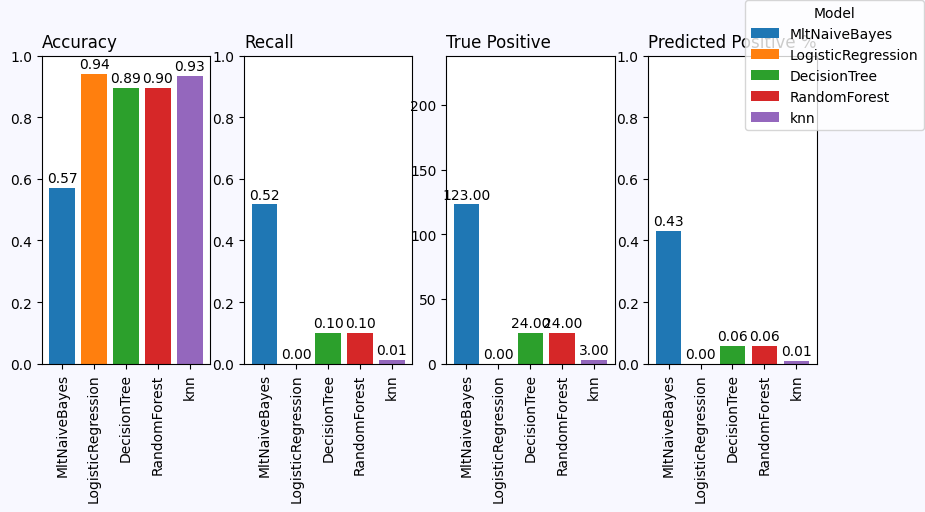

In [ ]:
accuray_a=[]
recall_a=[]
tp_a=[]
pred_p=[]

for name,model in models:
#     model = m['model'] # select the model
    model.fit(X_train2, y_train_balanced) # train the model
    y_pred=model.predict(X_benchmark) # predict the test data
# Compute False postive rate, and True positive rate
    #fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# classification report
    clf =classification_report(y_benchmark,y_pred)
# confusion matrix
    cm=confusion_matrix(y_benchmark,y_pred)
    tn, fp, fn, tp=cm.ravel()
    rec = tp/(tp+fn)
    pt=tp+fn # positive target
    prp = (tp+fp)/(tn + fp + fn + tp)
# accuracy score
    acc=accuracy_score(y_benchmark,y_pred)

    accuray_a.append(acc)
    recall_a.append(rec)
    tp_a.append(tp)
    pred_p.append(prp)
    print(name,' -   classification report          ', clf, '\n','  confusion matrix \n', cm )
    print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)
    print('accuracy ' , acc,'\n', 'recall  ', rec )

df_mod_acc2 = pd.DataFrame({'Model':names, 'accuracy':accuray_a})
df_mod_rec2 = pd.DataFrame({'Model':names, 'recall':recall_a})
df_mod_pt2 = pd.DataFrame({'Model':names, 'True Positive':tp_a})
df_mod_prp = pd.DataFrame({'Model':names, 'Predicted Positive':pred_p})
X_a = df_mod_acc2['Model']
Y_a  = df_mod_acc2['accuracy']
X_b = df_mod_rec2['Model']
Y_b  = df_mod_rec2['recall']
X_c = df_mod_pt2['Model']
Y_c  = df_mod_pt2['True Positive']
X_d = df_mod_prp['Model']
Y_d  = df_mod_prp['Predicted Positive']


#Now, plot the computed values
colors = dict(mcolors.TABLEAU_COLORS)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 4), facecolor="ghostwhite")

ax1.bar(X_a, Y_a, label=X_a, color=colors)
ax1.bar_label(ax1.containers[0], label_type='edge', padding=2, fmt='%0.2f')
ax1.set_title('Accuracy', loc="left")
ax1.set_ylim([0,1])
#ax1.legend(loc="lower right")
ax1.set_xticklabels(X_a, rotation=90)

ax2.bar(X_b, Y_b, label=X_b, color=colors)
ax2.bar_label(ax2.containers[0], label_type='edge', padding=2, fmt='%0.2f')
ax2.set_title('Recall', loc="left")
ax2.set_ylim([0,1])
#ax2.legend(loc="upper right")
ax2.set_xticklabels(X_b, rotation=90)

ax3.bar(X_c, Y_c, label=X_c, color=colors)
ax3.bar_label(ax3.containers[0], label_type='edge', padding=2, fmt='%0.2f')
ax3.set_title('True Positive', loc="left")
ax3.set_ylim([0,pt])
#ax3.legend(loc="upper right")
ax3.set_xticklabels(X_c, rotation=90)

ax4.bar(X_d, Y_d, label=X_d, color=colors)
ax4.bar_label(ax4.containers[0], label_type='edge', padding=2, fmt='%0.2f')
ax4.set_title('Predicted Positive %', loc="left")
ax4.set_ylim([0,1])
#ax3.legend(loc="upper right")
ax4.set_xticklabels(X_c, rotation=90)



# Create the legend
fig.legend(     # The line objects
           labels=X_a,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Model"  # Title for the legend
           )

# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
#plt.subplots_adjust(right=0.9)

plt.show()   # Display

fig.savefig("Accuracy_Recall_b_1.png")

# Saving figure by changing parameter values
fig.savefig("Accuracy_Recall_b_2.png", facecolor='w', bbox_inches="tight",
            pad_inches=0.1, transparent=True)

⚡**Precision** – What percent of your predictions were correct?
Precision – Accuracy of positive predictions.

Precision = TP/(TP + FP)

**Recall** – What percent of the positive cases did you catch?

Recall: Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)


 ♈In this reaserch there is no harm in having false predictions. But I am interested in having more positive cases.  I will choose the model with higher recall on target = 1. ♈

Evaluation results of model building

1) with 42 variables (426 encoded columns) in the training set, NB give high true positive count of 37 and accuracy of 86%

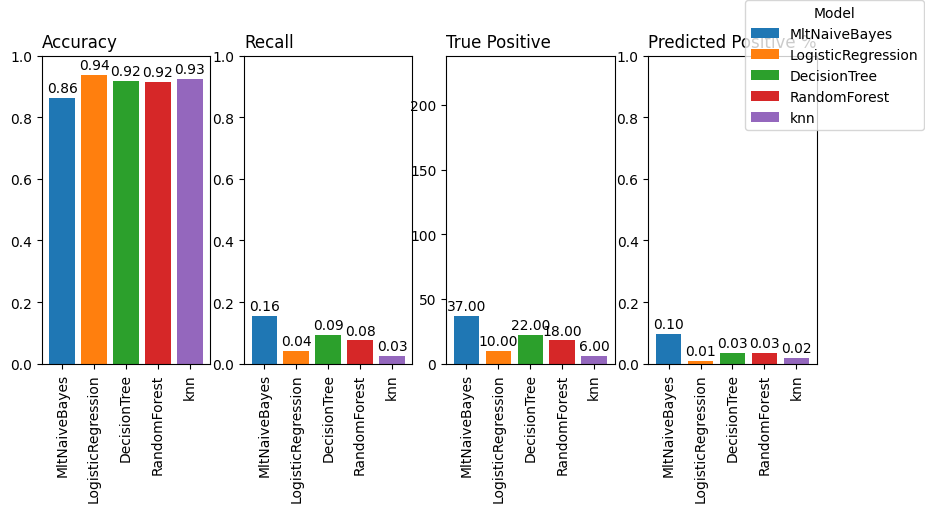

2) with 20 encoded columns in the training set, NB give high true positive count of 92 and accuracy of 60%
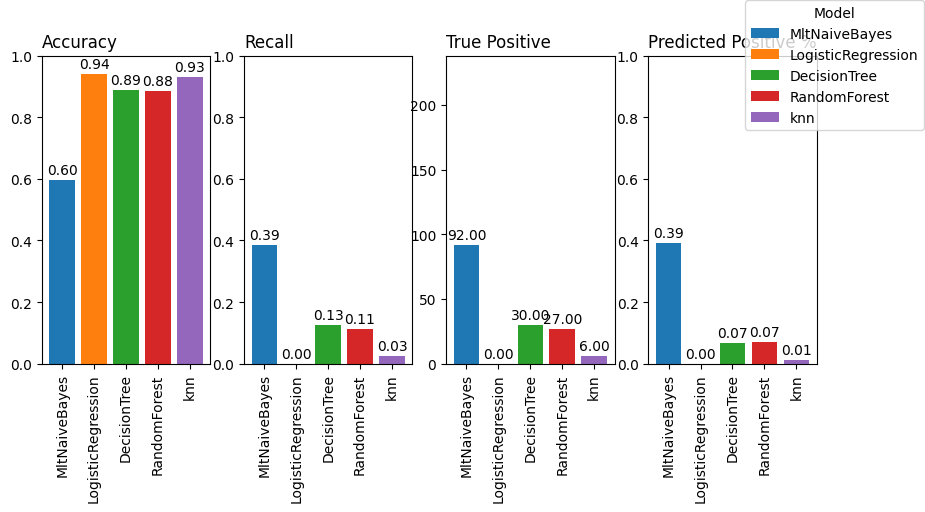

3) with 12 encoded columns in the training set, NB give high true positive count of 123 and accuracy of 57%

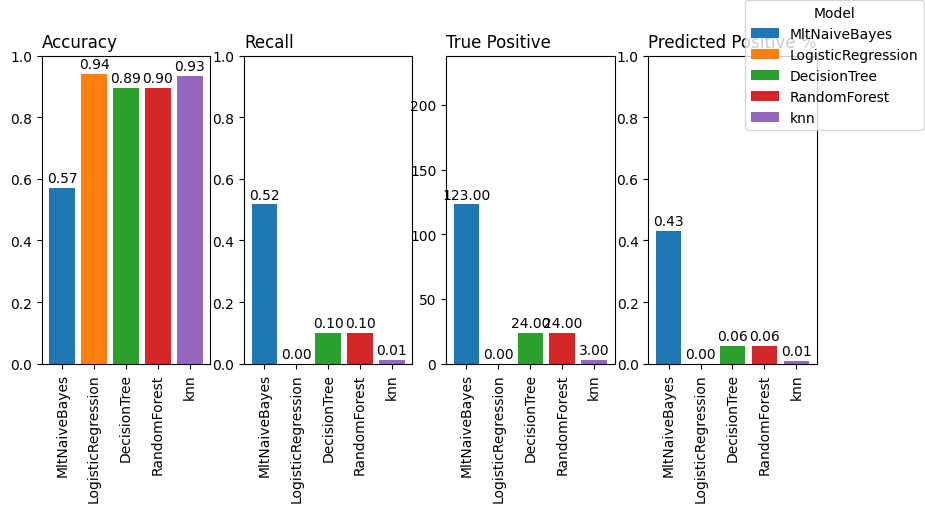

**Feature Selection**

In [ ]:
# identifying features with best chi squre value
from sklearn.feature_selection import SelectKBest

# for classification, we use these three
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# this function will take in X, y variables
# with criteria, and return a dataframe
# with most important columns
# based on that criteria
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)

    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

New_X = featureSelect_dataframe(X_train_balanced, y_train_balanced, chi2, 12)

sel_cols=New_X.columns

#datasets with selected columns
X_train_balanced_sel2 = X_train_balanced[sel_cols]

X_train_balanced_sel2.shape

(7666, 12)

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=28)
fit = bestfeatures.fit(X_train_balanced, y_train_balanced)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_balanced.columns)

 #concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                         Specs         Score
93         sd_religion_other_2  71619.192392
243  sd_empst_unskill_labour_2  62334.297230
372          sd_income_l_30k_2  61913.471256
178      sd_education_medium_3  61581.300452
86    sd_religion_protestant_5  61457.337408
179      sd_education_medium_4  61265.850108
114           sd_rel_married_7  59809.751264
383        sd_income_30k_45k_3  59524.288576
394        sd_income_45k_75k_4  58858.767279
167      sd_education_higher_2  58801.424813


In [ ]:
# Reducing features by dropping low variance columns
New_X.columns

Index(['sd_religion_protestant_5', 'sd_religion_other_2', 'sd_rel_married_7',
       'sd_rel_living_tg_1', 'sd_education_higher_2', 'sd_education_medium_3',
       'sd_education_medium_4', 'sd_empst_unskill_labour_2',
       'sd_socialclassB2_2', 'sd_income_l_30k_2', 'sd_income_30k_45k_3',
       'sd_income_45k_75k_4'],
      dtype='object')

Best attributes predicting caravan policy

Index(['sd_religion_protestant_5', 'sd_religion_other_2', 'sd_rel_married_7',
       'sd_rel_living_tg_1', 'sd_education_higher_2', 'sd_education_medium_3',
       'sd_education_medium_4', 'sd_empst_unskill_labour_2',
       'sd_socialclassB2_2', 'sd_income_l_30k_2', 'sd_income_30k_45k_3',
       'sd_income_45k_75k_4'],